In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [34]:
file_path = "../data/smart_farming.csv"
df = pd.read_csv(file_path)

df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    object 
 1   region                500 non-null    object 
 2   crop_type             500 non-null    object 
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       350 non-null    object 
 10  fertilizer_type       500 non-null    object 
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    object 
 13  harvest_date          500 non-null    object 
 14  total_days            500 non-null    int64  
 15  yield_kg_per_hectare  5

farm_id                   0
region                    0
crop_type                 0
soil_moisture_%           0
soil_pH                   0
temperature_C             0
rainfall_mm               0
humidity_%                0
sunlight_hours            0
irrigation_type         150
fertilizer_type           0
pesticide_usage_ml        0
sowing_date               0
harvest_date              0
total_days                0
yield_kg_per_hectare      0
sensor_id                 0
timestamp                 0
latitude                  0
longitude                 0
NDVI_index                0
crop_disease_status     130
dtype: int64

In [35]:
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())

cols_to_drop = ["latitude", "longitude"]
df = df.drop(columns=cols_to_drop)
print("Remaining columns:", df.columns)

Duplicates before: 0
Duplicates after: 0
Remaining columns: Index(['farm_id', 'region', 'crop_type', 'soil_moisture_%', 'soil_pH',
       'temperature_C', 'rainfall_mm', 'humidity_%', 'sunlight_hours',
       'irrigation_type', 'fertilizer_type', 'pesticide_usage_ml',
       'sowing_date', 'harvest_date', 'total_days', 'yield_kg_per_hectare',
       'sensor_id', 'timestamp', 'NDVI_index', 'crop_disease_status'],
      dtype='object')


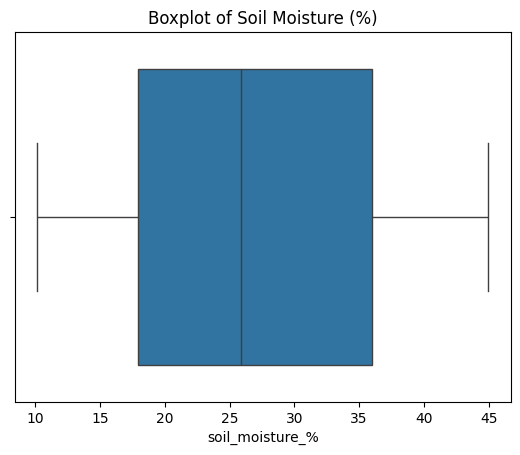

In [36]:
sns.boxplot(x=df["soil_moisture_%"])
plt.title("Boxplot of Soil Moisture (%)")
plt.show()

In [37]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [38]:
df.select_dtypes(include=["object"]).head()
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    int64  
 1   region                500 non-null    int64  
 2   crop_type             500 non-null    int64  
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       500 non-null    int64  
 10  fertilizer_type       500 non-null    int64  
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    int64  
 13  harvest_date          500 non-null    int64  
 14  total_days            500 non-null    int64  
 15  yield_kg_per_hectare  5

In [39]:
target = "yield_kg_per_hectare"
X = df.drop(columns=[target])
y = df[target]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
X[num_cols] = scaler.fit_transform(X[num_cols])
X.head()

farm_id    region  crop_type  soil_moisture_%   soil_pH  temperature_C  \
0 -1.728590  0.064867   1.451606         0.907293 -0.912829      -1.288608   
1 -1.721662  1.475020   0.748989        -0.691342  1.224023       1.030076   
2 -1.714734  1.475020   1.451606         0.253440  1.087265       0.504208   
3 -1.707806 -1.345286  -0.656244        -0.929017 -0.844450       1.694429   
4 -1.700877 -1.345286  -1.358861        -0.727832 -1.032493       1.718757   

   rainfall_mm  humidity_%  sunlight_hours  irrigation_type  fertilizer_type  \
0    -1.468632    0.809091        0.141931         0.836009         1.227812   
1    -1.270767   -0.277851       -0.804827         0.836009        -1.222911   
2     1.159559    0.251264        0.709986        -1.622842         0.002451   
3     0.419883    0.359958       -1.183530         0.836009         1.227812   
4     1.210237   -0.647001        0.532468         0.836009         0.002451   

   pesticide_usage_ml  sowing_date  harvest_date  total_days  sensor_id  \
0           -1.535116    -1.472521     -1.190774    0.149214  -1.728590   
1           -1.287944    -0.485356     -0.644454   -0.446689  -1.721662   
2           -0.858806    -0.526488      0.414043    1.460202  -1.714734   
3           -0.059668     0.213886      0.687203    0.864299  -1.707806   
4           -0.071041    -0.444224     -0.815179   -0.863822  -1.700877   

   timestamp  NDVI_index  crop_disease_status  
0  -0.609921    0.159451            -1.525303  
1   0.172090   -0.125894             0.865454  
2  -1.036472    1.129623            -1.525303  
3   0.669733   -0.924860             0.865454  
4  -0.017489    1.357899             0.865454

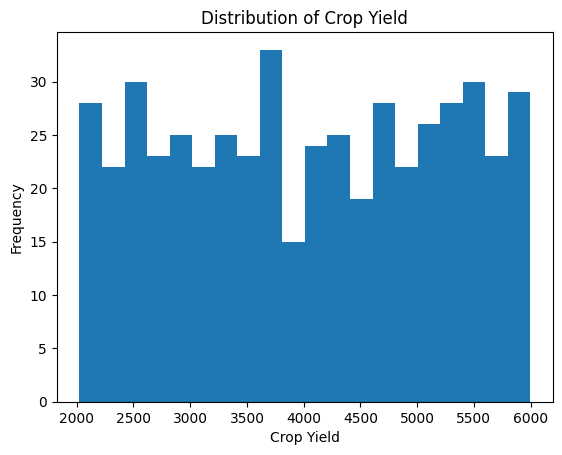

In [40]:
plt.hist(df[target], bins=20)
plt.title("Distribution of Crop Yield")
plt.xlabel("Crop Yield")
plt.ylabel("Frequency")
plt.show()


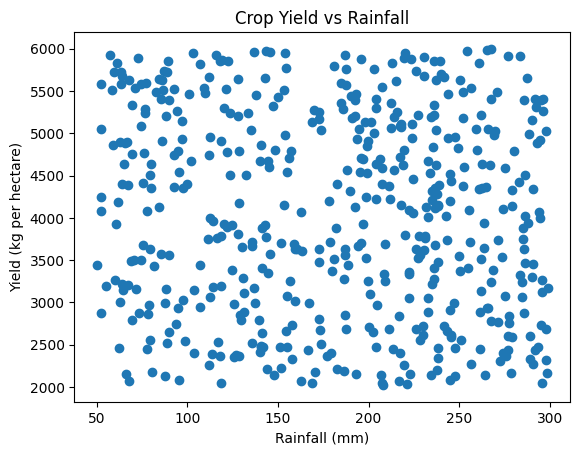

In [41]:
plt.scatter(df["rainfall_mm"], df[target])
plt.title("Crop Yield vs Rainfall")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Yield (kg per hectare)")
plt.show()

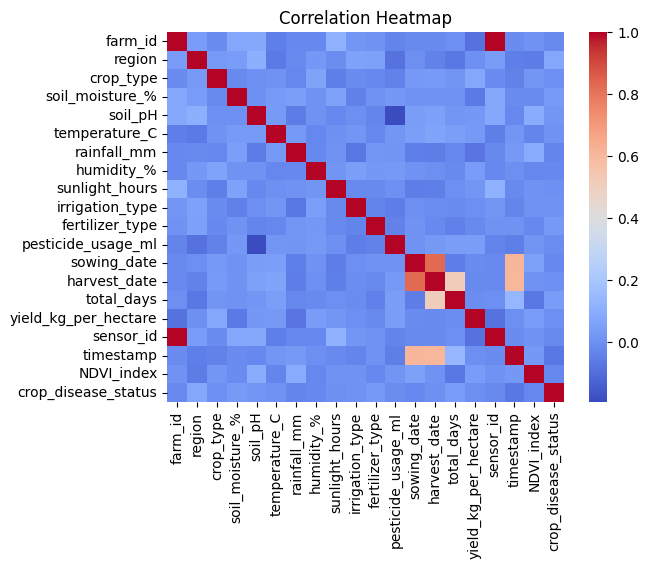

In [42]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


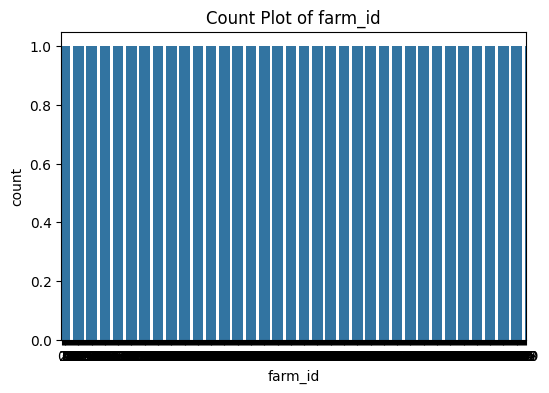

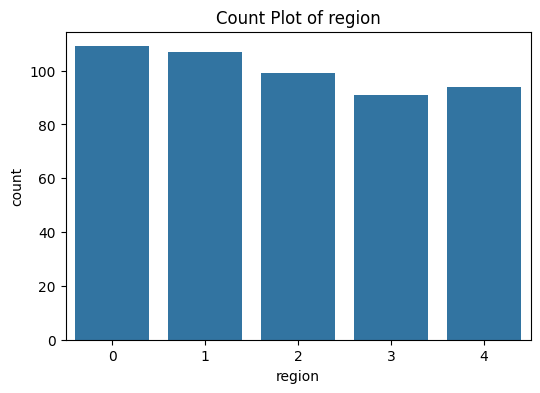

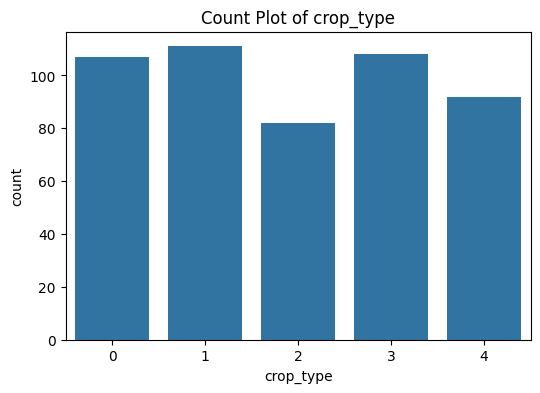

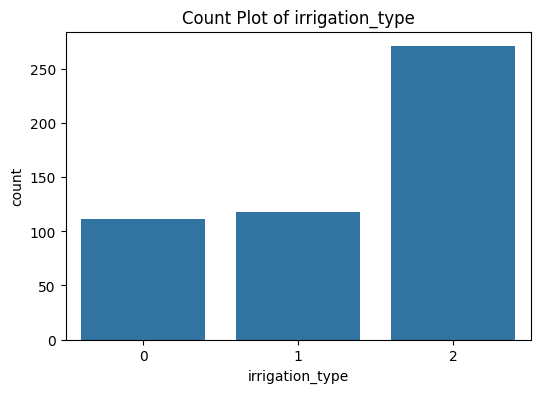

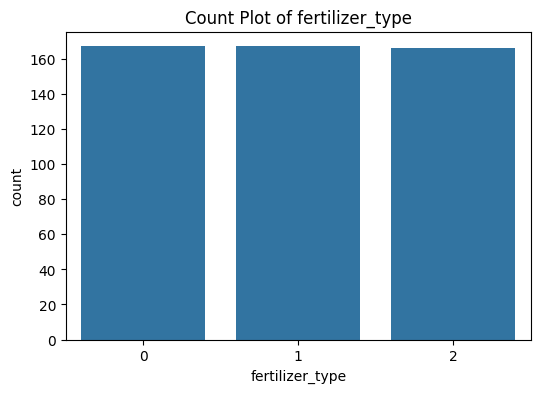

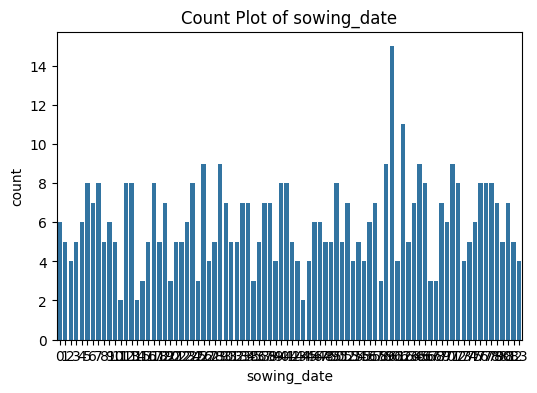

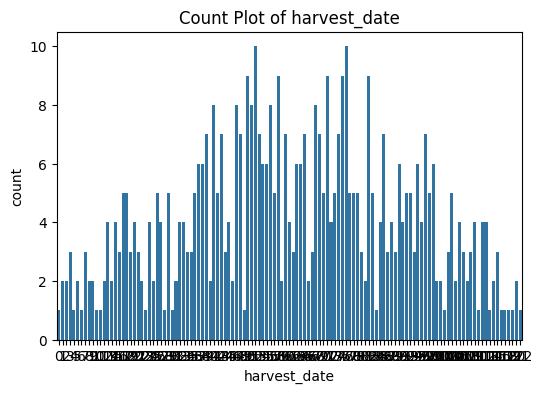

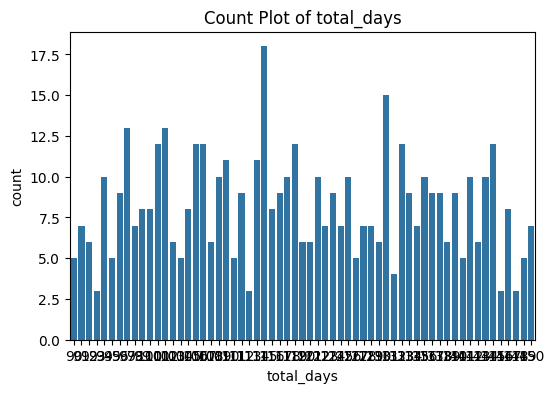

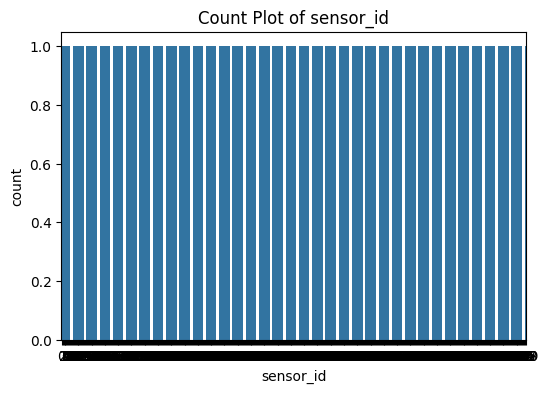

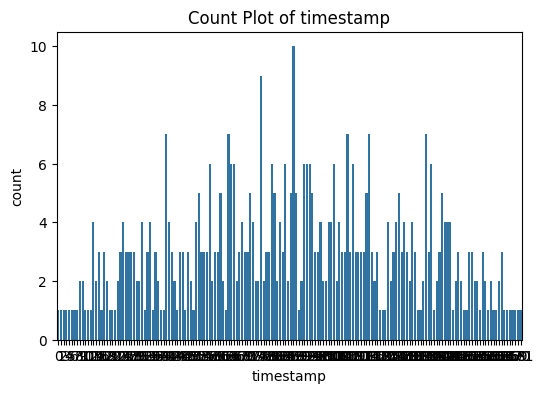

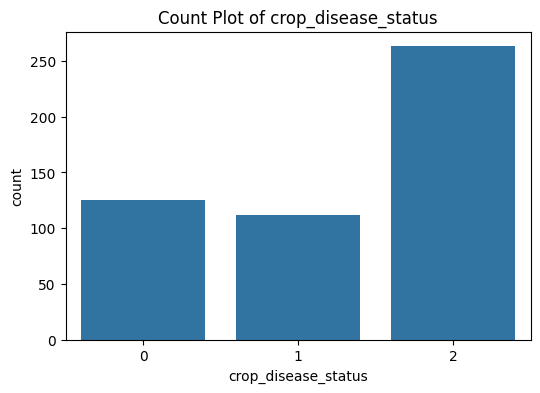

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = df.select_dtypes(include=["int64"]).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.show()


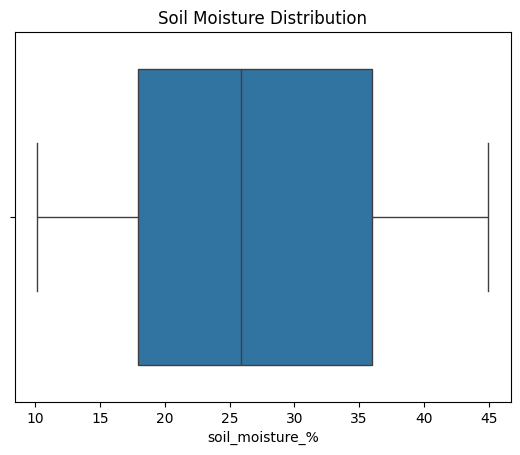

In [44]:
sns.boxplot(x=df["soil_moisture_%"])
plt.title("Soil Moisture Distribution")
plt.show()

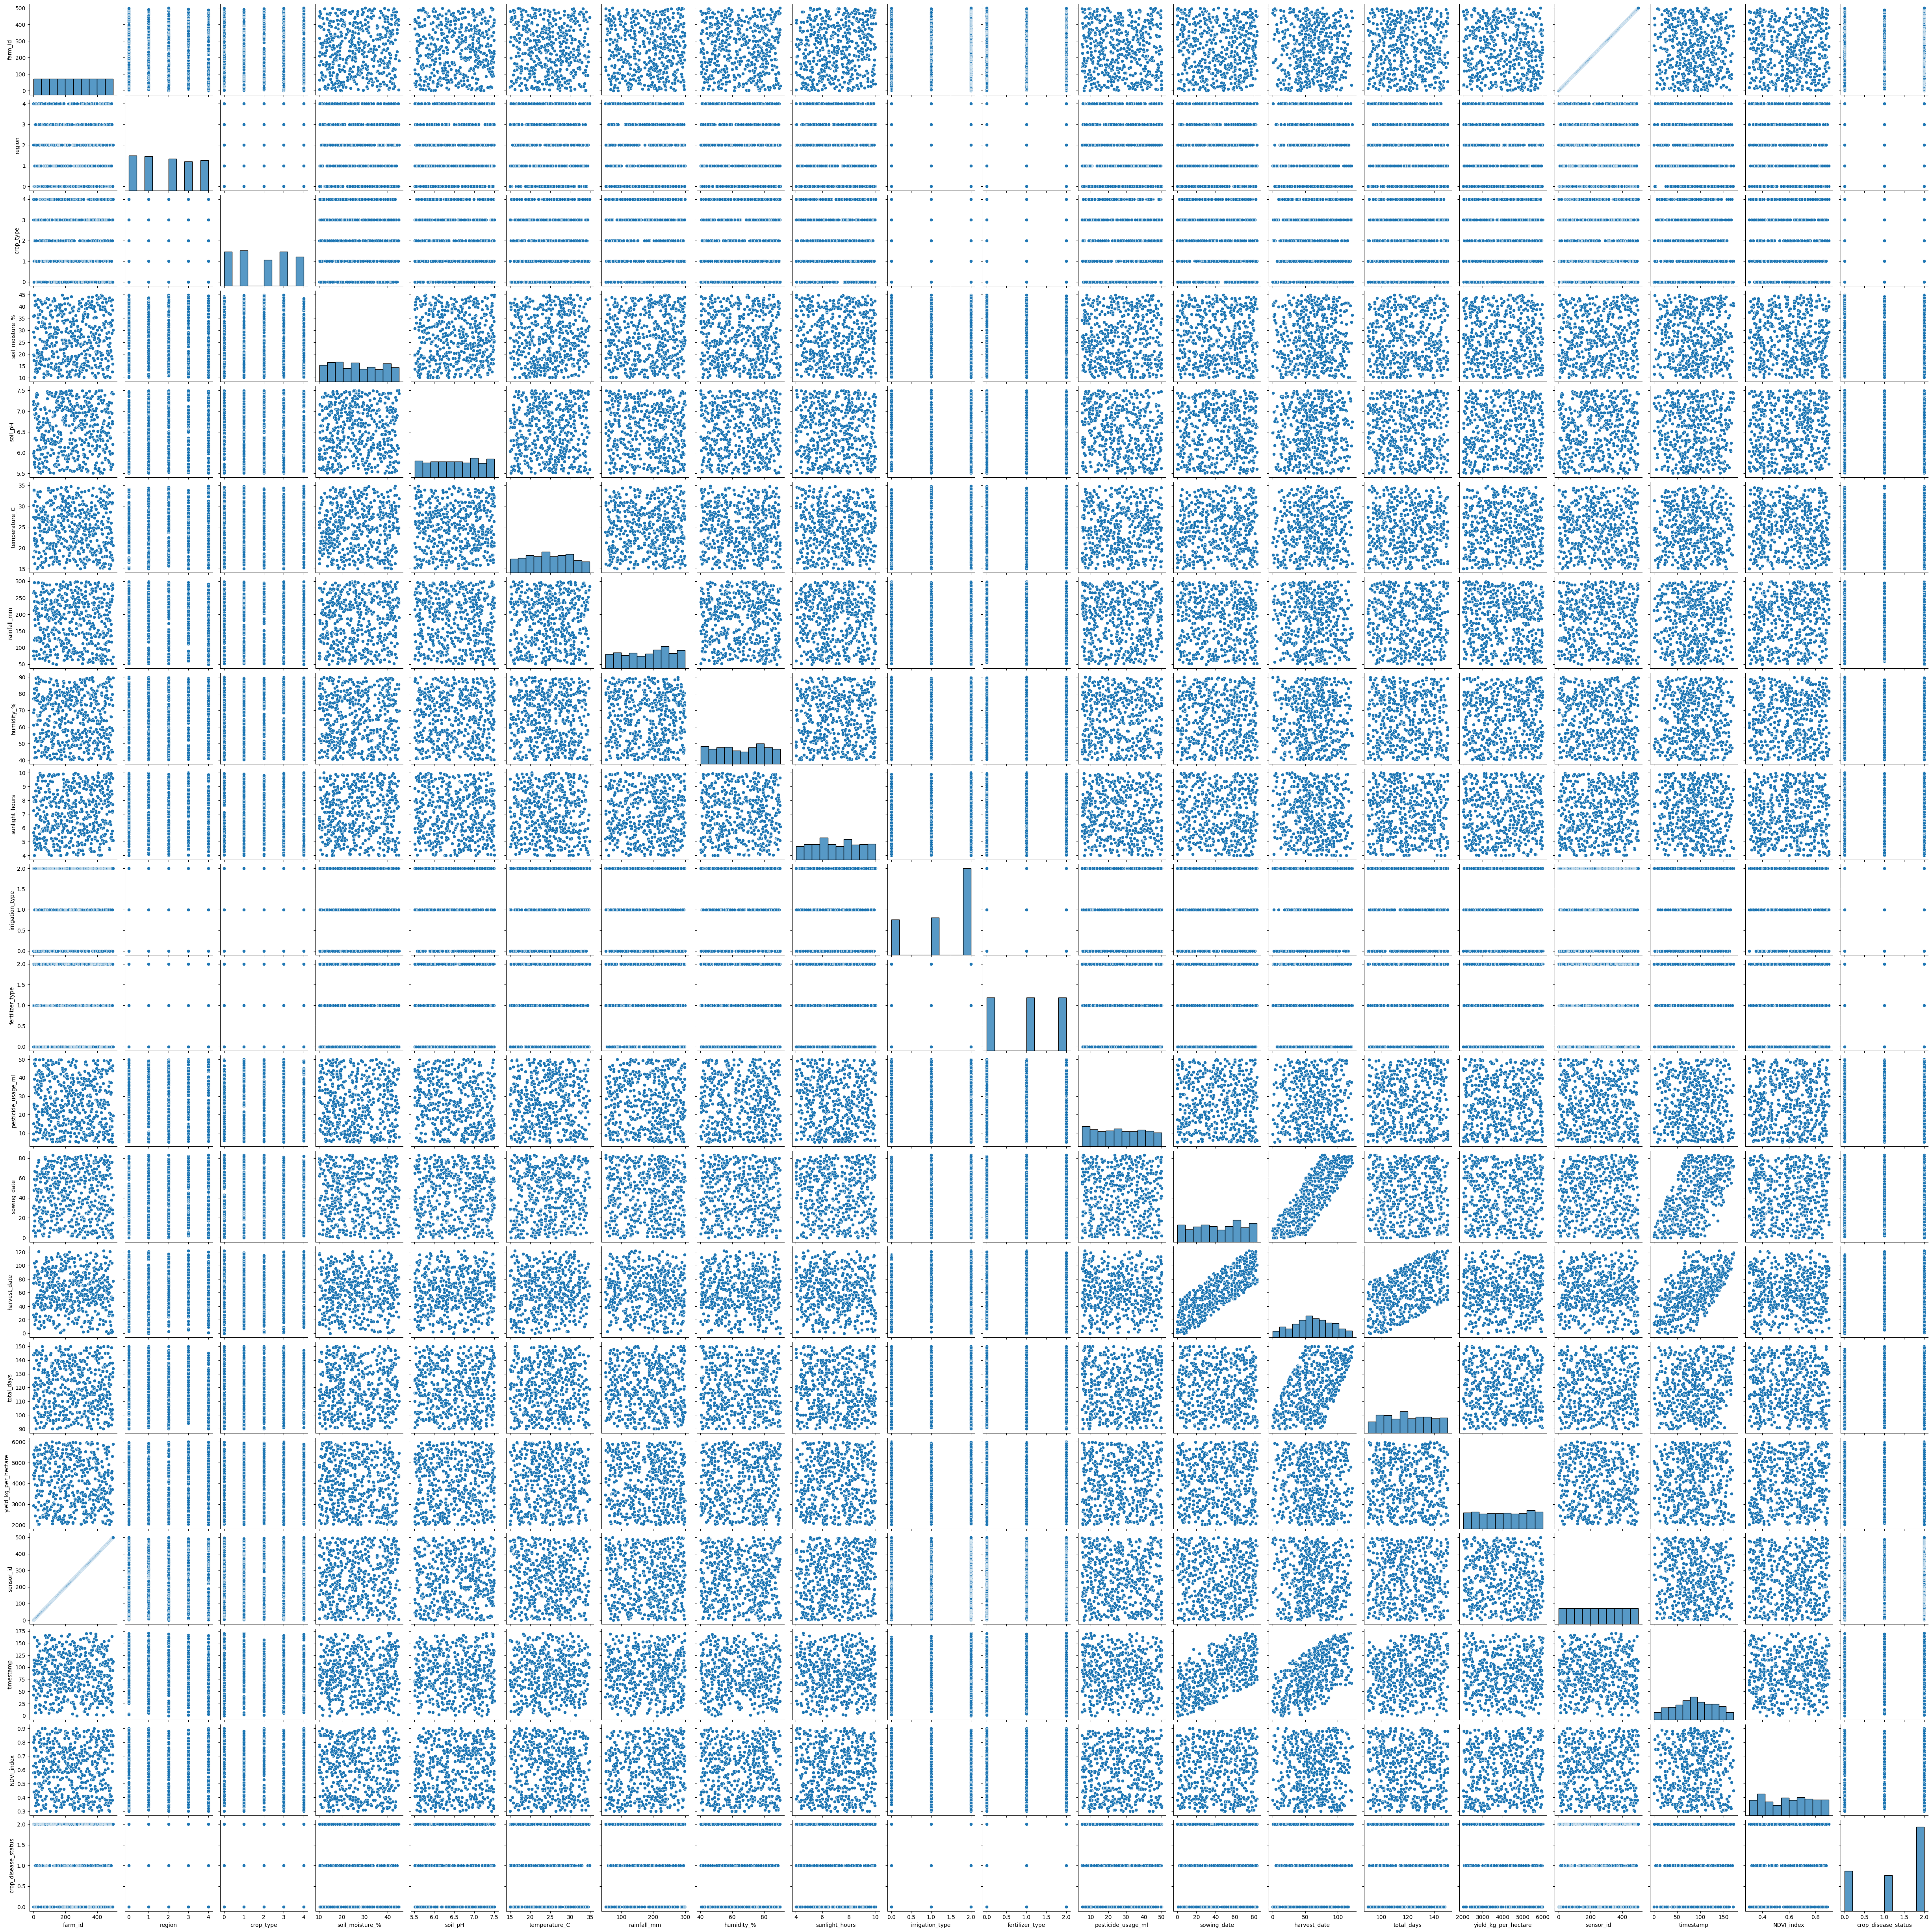

In [45]:
sns.pairplot(df)
plt.show()

In [46]:
missing_cols = ["irrigation_type", "crop_disease_status"]

In [47]:
for col in missing_cols:
    print(col, "-> mode:", df[col].mode()[0])
for col in missing_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
df.isnull().sum()


irrigation_type -> mode: 2
crop_disease_status -> mode: 2


farm_id                 0
region                  0
crop_type               0
soil_moisture_%         0
soil_pH                 0
temperature_C           0
rainfall_mm             0
humidity_%              0
sunlight_hours          0
irrigation_type         0
fertilizer_type         0
pesticide_usage_ml      0
sowing_date             0
harvest_date            0
total_days              0
yield_kg_per_hectare    0
sensor_id               0
timestamp               0
NDVI_index              0
crop_disease_status     0
dtype: int64

In [48]:
cols_to_drop = ["farm_id", "sensor_id", "timestamp", "sowing_date", "harvest_date"]
df = df.drop(columns=cols_to_drop)
df.columns


Index(['region', 'crop_type', 'soil_moisture_%', 'soil_pH', 'temperature_C',
       'rainfall_mm', 'humidity_%', 'sunlight_hours', 'irrigation_type',
       'fertilizer_type', 'pesticide_usage_ml', 'total_days',
       'yield_kg_per_hectare', 'NDVI_index', 'crop_disease_status'],
      dtype='object')

In [49]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=["object"]).columns
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()



region  crop_type  soil_moisture_%  soil_pH  temperature_C  rainfall_mm  \
0       2          4            35.95     5.99          17.79        75.62   
1       4          3            19.74     7.24          30.18        89.91   
2       4          4            29.32     7.16          27.37       265.43   
3       0          1            17.33     6.03          33.73       212.01   
4       0          0            19.37     5.92          33.86       269.09   

   humidity_%  sunlight_hours  irrigation_type  fertilizer_type  \
0       77.03            7.27                2                2   
1       61.13            5.67                2                0   
2       68.87            8.23                0                1   
3       70.46            5.03                2                2   
4       55.73            7.93                2                1   

   pesticide_usage_ml  total_days  yield_kg_per_hectare  NDVI_index  \
0                6.34         122               4408.07        0.63   
1                9.60         112               5389.98        0.58   
2               15.26         144               2931.16        0.80   
3               25.80         134               4227.80        0.44   
4               25.65         105               4979.96        0.84   

   crop_disease_status  
0                    0  
1                    2  
2                    0  
3                    2  
4                    2

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   region                500 non-null    int64  
 1   crop_type             500 non-null    int64  
 2   soil_moisture_%       500 non-null    float64
 3   soil_pH               500 non-null    float64
 4   temperature_C         500 non-null    float64
 5   rainfall_mm           500 non-null    float64
 6   humidity_%            500 non-null    float64
 7   sunlight_hours        500 non-null    float64
 8   irrigation_type       500 non-null    int64  
 9   fertilizer_type       500 non-null    int64  
 10  pesticide_usage_ml    500 non-null    float64
 11  total_days            500 non-null    int64  
 12  yield_kg_per_hectare  500 non-null    float64
 13  NDVI_index            500 non-null    float64
 14  crop_disease_status   500 non-null    int64  
dtypes: float64(9), int64(6)

In [51]:
from sklearn.preprocessing import StandardScaler

target = "yield_kg_per_hectare"
X = df.drop(columns=[target])
y = df[target]

num_cols = X.select_dtypes(include=["int64", "float64"]).columns

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X.head()


region  crop_type  soil_moisture_%   soil_pH  temperature_C  rainfall_mm  \
0  0.064867   1.451606         0.907293 -0.912829      -1.288608    -1.468632   
1  1.475020   0.748989        -0.691342  1.224023       1.030076    -1.270767   
2  1.475020   1.451606         0.253440  1.087265       0.504208     1.159559   
3 -1.345286  -0.656244        -0.929017 -0.844450       1.694429     0.419883   
4 -1.345286  -1.358861        -0.727832 -1.032493       1.718757     1.210237   

   humidity_%  sunlight_hours  irrigation_type  fertilizer_type  \
0    0.809091        0.141931         0.836009         1.227812   
1   -0.277851       -0.804827         0.836009        -1.222911   
2    0.251264        0.709986        -1.622842         0.002451   
3    0.359958       -1.183530         0.836009         1.227812   
4   -0.647001        0.532468         0.836009         0.002451   

   pesticide_usage_ml  total_days  NDVI_index  crop_disease_status  
0           -1.535116    0.149214    0.159451            -1.525303  
1           -1.287944   -0.446689   -0.125894             0.865454  
2           -0.858806    1.460202    1.129623            -1.525303  
3           -0.059668    0.864299   -0.924860             0.865454  
4           -0.071041   -0.863822    1.357899             0.865454

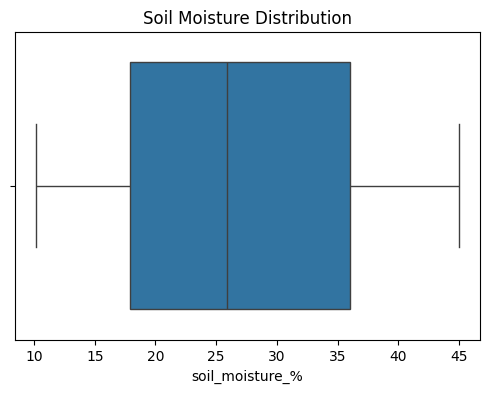

In [52]:
plt.figure(figsize=(6,4))

sns.boxplot(x=df["soil_moisture_%"])
plt.title("Soil Moisture Distribution")

plt.savefig("../plots/soil_moisture_boxplot.png", dpi=300)
plt.show()


In [53]:
print("Statistical Summary (Numeric Columns)")
display(df.describe())

print("\nMedian Values")
display(df.median(numeric_only=True))

print("\nMode Values")
display(df.mode().head())


Statistical Summary (Numeric Columns)


region   crop_type  soil_moisture_%     soil_pH  temperature_C  \
count  500.000000  500.000000       500.000000  500.000000     500.000000   
mean     1.908000    1.934000        26.750140    6.523980      24.675740   
std      1.419707    1.424677        10.150053    0.585558       5.348899   
min      0.000000    0.000000        10.160000    5.510000      15.000000   
25%      1.000000    1.000000        17.890000    6.030000      20.295000   
50%      2.000000    2.000000        25.855000    6.530000      24.655000   
75%      3.000000    3.000000        36.022500    7.040000      29.090000   
max      4.000000    4.000000        44.980000    7.500000      34.840000   

       rainfall_mm  humidity_%  sunlight_hours  irrigation_type  \
count   500.000000  500.000000       500.00000       500.000000   
mean    181.685740   65.194460         7.03014         1.320000   
std      72.293091   14.642849         1.69167         0.814203   
min      50.170000   40.230000         4.01000         0.000000   
25%     119.217500   51.865000         5.66750         1.000000   
50%     191.545000   65.685000         6.99500         2.000000   
75%     239.035000   77.995000         8.47000         2.000000   
max     298.960000   90.000000        10.00000         2.000000   

       fertilizer_type  pesticide_usage_ml  total_days  yield_kg_per_hectare  \
count       500.000000          500.000000  500.000000             500.00000   
mean          0.998000           26.586980  119.496000            4032.92694   
std           0.816903           13.202429   16.798046            1174.43304   
min           0.000000            5.050000   90.000000            2023.56000   
25%           0.000000           14.945000  105.750000            2994.82000   
50%           1.000000           25.980000  119.000000            4071.69000   
75%           2.000000           38.005000  134.000000            5062.11000   
max           2.000000           49.940000  150.000000            5998.29000   

       NDVI_index  crop_disease_status  
count  500.000000           500.000000  
mean     0.602060             1.276000  
std      0.175402             0.837393  
min      0.300000             0.000000  
25%      0.447500             0.750000  
50%      0.610000             2.000000  
75%      0.750000             2.000000  
max      0.900000             2.000000


Median Values


region                     2.000
crop_type                  2.000
soil_moisture_%           25.855
soil_pH                    6.530
temperature_C             24.655
rainfall_mm              191.545
humidity_%                65.685
sunlight_hours             6.995
irrigation_type            2.000
fertilizer_type            1.000
pesticide_usage_ml        25.980
total_days               119.000
yield_kg_per_hectare    4071.690
NDVI_index                 0.610
crop_disease_status        2.000
dtype: float64


Mode Values


region  crop_type  soil_moisture_%  soil_pH  temperature_C  rainfall_mm  \
0     0.0        1.0            16.25     5.97          16.18        79.51   
1     NaN        NaN              NaN     6.33          24.83        88.30   
2     NaN        NaN              NaN      NaN          29.66        88.64   
3     NaN        NaN              NaN      NaN            NaN       137.08   
4     NaN        NaN              NaN      NaN            NaN          NaN   

   humidity_%  sunlight_hours  irrigation_type  fertilizer_type  \
0        49.2            7.96              2.0              0.0   
1         NaN             NaN              NaN              1.0   
2         NaN             NaN              NaN              NaN   
3         NaN             NaN              NaN              NaN   
4         NaN             NaN              NaN              NaN   

   pesticide_usage_ml  total_days  yield_kg_per_hectare  NDVI_index  \
0                7.60       115.0               2023.56        0.59   
1                8.82         NaN               2029.16         NaN   
2                9.11         NaN               2043.13         NaN   
3                9.44         NaN               2046.41         NaN   
4               10.16         NaN               2049.06         NaN   

   crop_disease_status  
0                  2.0  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

In [54]:
df.to_csv("cleaned_dataset.csv", index=False)


In [55]:
from sklearn.model_selection import train_test_split

X = df.drop("yield_kg_per_hectare", axis=1)
y = df["yield_kg_per_hectare"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [56]:
#X_train.shape, X_test.shape, y_train.shape, y_test.shape
#We have runned this code to test our work.

In [57]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

lr = LinearRegression()

lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mbe = np.mean(y_train_pred - y_train)
train_r2 = r2_score(y_train, y_train_pred)

print("Training Results of Linear Regression\n")
print("MSE :", train_mse)
print("RMSE:", train_rmse)
print("MAE :", train_mae)
print("MBE :", train_mbe)
print("R2  :", train_r2)

y_test_pred = lr.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mbe = np.mean(y_test_pred - y_test)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Results of Linear Regression\n")
print("MSE :", test_mse)
print("RMSE:", test_rmse)
print("MAE :", test_mae)
print("MBE :", test_mbe)
print("R2  :", test_r2)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr, X, y, cv=kfold, scoring="r2")

print("\nResults of Cross Validation\n")
print("Mean R2:", cv_scores.mean())
print("Std R2 :", cv_scores.std())


Training Results of Linear Regression

MSE : 1330720.289172553
RMSE: 1153.5685021586507
MAE : 1003.4132619020442
MBE : 4.934008757118136e-13
R2  : 0.03240404829717547

Test Results of Linear Regression

MSE : 1461269.2291254115
RMSE: 1208.82969401211
MAE : 1068.4926277129352
MBE : 26.230739073182182
R2  : -0.058077006332838854

Results of Cross Validation

Mean R2: -0.06813641847062835
Std R2 : 0.02012795270101192


In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

X = df.drop("yield_kg_per_hectare", axis=1)
y = df["yield_kg_per_hectare"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mbe = np.mean(y_train_pred - y_train)
train_r2 = r2_score(y_train, y_train_pred)

print("Training Results of Random Forest Regressor\n")
print("MSE :", train_mse)
print("RMSE:", train_rmse)
print("MAE :", train_mae)
print("MBE :", train_mbe)
print("R2  :", train_r2)

y_test_pred = rf.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mbe = np.mean(y_test_pred - y_test)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Results of Random Forest Regressor\n")
print("MSE :", test_mse)
print("RMSE:", test_rmse)
print("MAE :", test_mae)
print("MBE :", test_mbe)
print("R2  :", test_r2)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X, y, cv=kfold, scoring="r2")

print("\nResults of Cross Validation\n")
print("Mean R2:", cv_scores.mean())
print("Std R2 :", cv_scores.std())


Training Results of Random Forest Regressor

MSE : 197460.31666742213
RMSE: 444.3650713854793
MAE : 378.8230689166674
MBE : -1.600011916667151
R2  : 0.8564222665093967

Test Results of Random Forest Regressor

MSE : 1433392.50021877
RMSE: 1197.2437096175406
MAE : 1048.9182936666666
MBE : -9.192804333333916
R2  : -0.03789200189970976

Results of Cross Validation

Mean R2: -0.03881680399821286
Std R2 : 0.05851492696552877


In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

target = "yield_kg_per_hectare"

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X_train, y_train)

y_train_pred = gbr.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mbe = np.mean(y_train_pred - y_train)
train_r2 = r2_score(y_train, y_train_pred)

print("Training Results of Gradient Boosting Regressor\n")
print("MSE :", train_mse)
print("RMSE:", train_rmse)
print("MAE :", train_mae)
print("MBE :", train_mbe)
print("R2  :", train_r2)

y_test_pred = gbr.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mbe = np.mean(y_test_pred - y_test)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Results of Gradient Boosting Regressor\n")
print("MSE :", test_mse)
print("RMSE:", test_rmse)
print("MAE :", test_mae)
print("MBE :", test_mbe)
print("R2  :", test_r2)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(gbr, X, y, cv=kfold, scoring="r2")

print("\nResults of Cross Validation\n")
print("Mean R2:", cv_scores.mean())
print("Std R2 :", cv_scores.std())


Training Results of Gradient Boosting Regressor

MSE : 434814.4452024086
RMSE: 659.4046141804049
MAE : 545.3943476464473
MBE : 9.322320693172514e-14
R2  : 0.6838368661370839

Test Results of Gradient Boosting Regressor

MSE : 1629132.2741871914
RMSE: 1276.3746605864562
MAE : 1110.190740044652
MBE : -62.96655400091815
R2  : -0.17962341588748698

Results of Cross Validation

Mean R2: -0.12092050964673202
Std R2 : 0.10140694183005663


In [77]:
def iqr_cap(df_in, cols=None, factor=1.5):
    df_out = df_in.copy()
    if cols is None:
        cols = df_out.select_dtypes(include=[np.number]).columns.tolist()
    caps = {}
    for c in cols:
        q1 = df_out[c].quantile(0.25)
        q3 = df_out[c].quantile(0.75)
        iqr = q3 - q1
        low = q1 - factor * iqr
        high = q3 + factor * iqr
        caps[c] = (low, high)
        df_out[c] = df_out[c].clip(low, high)
    return df_out, caps

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df_capped, caps = iqr_cap(df, cols=num_cols, factor=1.5)

print("Outlier treatment applied with IQR capping.")
print("Example caps (first 5 numeric cols):")
for k in list(caps.keys())[:5]:
    print(k, "=>", caps[k])

df = df_capped

Outlier treatment applied with IQR capping.
Example caps (first 5 numeric cols):
region => (np.float64(-2.0), np.float64(6.0))
crop_type => (np.float64(-2.0), np.float64(6.0))
soil_moisture_% => (np.float64(-9.30875), np.float64(63.22125))
soil_pH => (np.float64(4.515000000000001), np.float64(8.555))
temperature_C => (np.float64(7.1025000000000045), np.float64(42.2825))


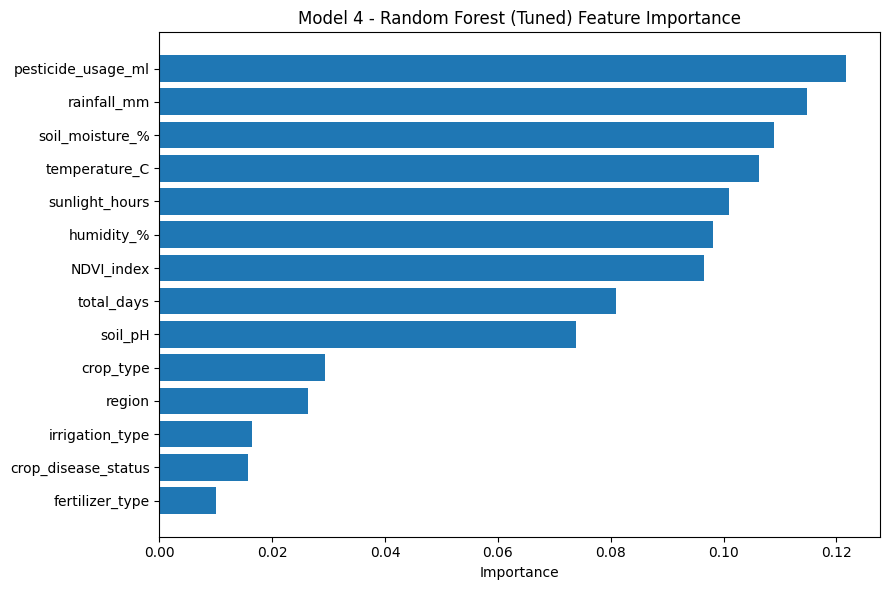

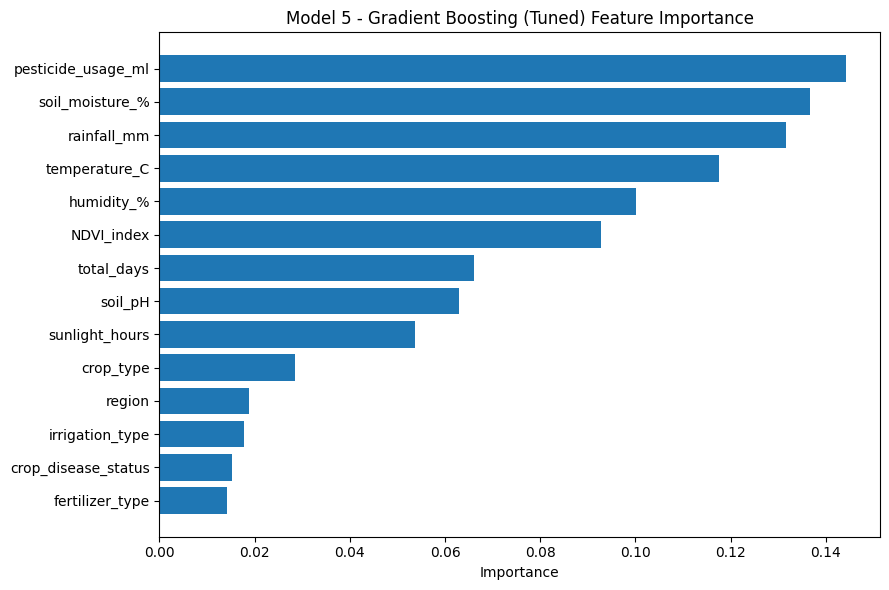

In [78]:
# ================================
# FEATURE IMPORTANCE - TUNED MODELS
# ================================

import pandas as pd
import matplotlib.pyplot as plt

# Feature names preprocessing dışarıda yapıldığı için
feature_names = X_train.columns

def plot_feature_importance(title, model, feature_names, top_n=15):
    if not hasattr(model, "feature_importances_"):
        print(f"{title}: feature_importances_ not available.")
        return

    fi = pd.DataFrame({
        "Feature": feature_names,
        "Importance": model.feature_importances_
    }).sort_values("Importance", ascending=False).head(top_n)

    plt.figure(figsize=(9, 6))
    plt.barh(fi["Feature"], fi["Importance"])
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()


# ----------------
# Model 4 - Random Forest (Tuned)
# ----------------
rf_model = best_models["Random Forest"]
plot_feature_importance(
    "Model 4 - Random Forest (Tuned) Feature Importance",
    rf_model,
    feature_names
)

# ----------------
# Model 5 - Gradient Boosting (Tuned)
# ----------------
gbr_model = best_models["Gradient Boosting"]
plot_feature_importance(
    "Model 5 - Gradient Boosting (Tuned) Feature Importance",
    gbr_model,
    feature_names
)


In [79]:
# ENSEMBLE LEARNING + HYPERPARAMETER TUNING (REGRESSION)
# Creates ALL missing tables for the report
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -----------------------------
# Target
# -----------------------------
target = "yield_kg_per_hectare"
if target not in df.columns:
    raise ValueError(f"Target column '{target}' not found in df.columns")

X = df.drop(columns=[target])
y = df[target]

# -----------------------------
# Train / Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Metrics helper
# -----------------------------
def regression_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    eps = 1e-9
    denom = np.where(np.abs(y_true) < eps, eps, y_true)
    mape = np.mean(np.abs((y_true - y_pred) / denom)) * 100.0

    return {
        "RMSE": rmse,
        "R2": r2,
        "MAE": mae,
        "MAPE(%)": mape
    }

# ============================================================
# 1) BEFORE HYPERPARAMETER TUNING
# ============================================================
models_before = {
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
}

before_rows = []
for name, model in models_before.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    before_rows.append({"Model": name, **regression_metrics(y_test, preds)})

before_table = pd.DataFrame(before_rows).sort_values("RMSE")
print("\n=== Ensemble Learning Models Performance (Before Hyperparameter Tuning) ===")
print(before_table.to_string(index=False))

# ============================================================
# 2) HYPERPARAMETER TUNING (RandomizedSearchCV)
# ============================================================
param_spaces = {
    "Random Forest": {
        "n_estimators": [200, 400, 600, 800, 1000],
        "max_depth": [None, 5, 10, 20, 30, 40],
        "min_samples_split": [2, 5, 10, 20],
        "min_samples_leaf": [1, 2, 4, 8],
        "max_features": ["sqrt", "log2", None],
        "bootstrap": [True, False],
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200, 400, 600],
        "learning_rate": [0.01, 0.03, 0.05, 0.1, 0.2],
        "max_depth": [2, 3, 4, 5],
        "min_samples_split": [2, 5, 10, 20],
        "min_samples_leaf": [1, 2, 4, 8],
        "subsample": [0.6, 0.8, 1.0],
        "max_features": ["sqrt", "log2", None],
    },
}

models_for_search = {
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
}

best_models = {}
hyperparam_details = []

for name, base_model in models_for_search.items():
    search = RandomizedSearchCV(
        estimator=base_model,
        param_distributions=param_spaces[name],
        n_iter=30,  # reduce to 15 if slow
        scoring="neg_root_mean_squared_error",
        cv=5,
        random_state=42,
        n_jobs=-1,
        verbose=0
    )
    search.fit(X_train, y_train)

    best_models[name] = search.best_estimator_
    hyperparam_details.append({
        "Model": name,
        "Best CV RMSE": -search.best_score_,
        "Best Params": search.best_params_
    })

print("\n=== Hyperparameter Details (RandomizedSearchCV) ===")
for row in hyperparam_details:
    print(f"\nModel: {row['Model']}")
    print(f"Best CV RMSE: {row['Best CV RMSE']:.4f}")
    print("Best Params:")
    for k, v in row["Best Params"].items():
        print(f"  - {k}: {v}")

# ============================================================
# 3) AFTER HYPERPARAMETER TUNING
# ============================================================
after_rows = []
for name, model in best_models.items():
    preds = model.predict(X_test)
    after_rows.append({"Model": name, **regression_metrics(y_test, preds)})

after_table = pd.DataFrame(after_rows).sort_values("RMSE")
print("\n=== Ensemble Learning Models Performance (After Hyperparameter Tuning) ===")
print(after_table.to_string(index=False))

# ============================================================
# (Optional) 5-Fold CV R2 for tuned models (for discussion)
# ============================================================
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
print("\n=== (Optional) 5-Fold CV Mean R2 of Tuned Models ===")
for name, model in best_models.items():
    scores = cross_val_score(model, X, y, cv=kfold, scoring="r2")
    print(f"{name}: mean={scores.mean():.4f}, std={scores.std():.4f}")


=== Ensemble Learning Models Performance (Before Hyperparameter Tuning) ===
            Model        RMSE        R2         MAE   MAPE(%)
    Random Forest 1198.673921 -0.040373 1054.142865 29.792912
Gradient Boosting 1276.374661 -0.179623 1110.190740 30.996424

=== Hyperparameter Details (RandomizedSearchCV) ===

Model: Random Forest
Best CV RMSE: 1175.4937
Best Params:
  - n_estimators: 400
  - min_samples_split: 10
  - min_samples_leaf: 1
  - max_features: log2
  - max_depth: 5
  - bootstrap: True

Model: Gradient Boosting
Best CV RMSE: 1172.0435
Best Params:
  - subsample: 0.8
  - n_estimators: 100
  - min_samples_split: 2
  - min_samples_leaf: 1
  - max_features: log2
  - max_depth: 3
  - learning_rate: 0.01

=== Ensemble Learning Models Performance (After Hyperparameter Tuning) ===
            Model        RMSE        R2         MAE   MAPE(%)
    Random Forest 1194.767482 -0.033603 1058.469505 30.224803
Gradient Boosting 1195.061830 -0.034113 1062.393691 30.348483

=== (Optional